In [18]:
import pandas as pd
import numpy as np
import tensorflow as tf
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, r2_score
from sklearn.preprocessing import LabelEncoder, minmax_scale, MinMaxScaler, StandardScaler, OneHotEncoder, RobustScaler

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("E:/Python Programs/EuroAstro/new_y1.csv")
df.head()

,Date_,Month,Date,Year,Weekday,Lagna,Sun,Moon,Mars,Mercury,Jupiter,Venus,Saturn,Rahu,Ketu,1st Num,1st Num.1
0,1/1/2021,1,1,2021,Friday,20,40,9,2,80,84,72,84,5,54,SXTW-NP-E,0.062500
1,1/5/2021,1,5,2021,Tuesday,30,60,26,2,42,84,19,84,5,54,EF-NP-E,0.083333
2,1/8/2021,1,8,2021,Friday,40,80,48,3,63,22,38,84,5,54,SXTW-NP-E,0.055556
3,1/12/2021,1,12,2021,Tuesday,11,21,80,3,22,22,76,84,5,54,OF-P-E,0.500000
4,1/15/2021,1,15,2021,Friday,11,42,92,4,66,22,20,84,5,54,OF-NP-E,0.250000


In [3]:
df.drop(labels=['Date_','Month','Date','Year','Weekday', '1st Num'], axis=1, inplace=True)

In [4]:
df.head()

,Lagna,Sun,Moon,Mars,Mercury,Jupiter,Venus,Saturn,Rahu,Ketu,1st Num.1
0,20,40,9,2,80,84,72,84,5,54,0.062500
1,30,60,26,2,42,84,19,84,5,54,0.083333
2,40,80,48,3,63,22,38,84,5,54,0.055556
3,11,21,80,3,22,22,76,84,5,54,0.500000
4,11,42,92,4,66,22,20,84,5,54,0.250000


In [ ]:
# encoding = LabelEncoder()
# df["1st Num"] = encoding.fit_transform(df["1st Num"])

In [ ]:
# print(encoding.classes_)

In [ ]:
# df['1st Num'].value_counts()

In [5]:
X = df.iloc[:,0:10]
y = df.iloc[:,-1]

In [6]:
X.head()

,Lagna,Sun,Moon,Mars,Mercury,Jupiter,Venus,Saturn,Rahu,Ketu
0,20,40,9,2,80,84,72,84,5,54
1,30,60,26,2,42,84,19,84,5,54
2,40,80,48,3,63,22,38,84,5,54
3,11,21,80,3,22,22,76,84,5,54
4,11,42,92,4,66,22,20,84,5,54


In [7]:
y.head()

0    0.062500
1    0.083333
2    0.055556
3    0.500000
4    0.250000
Name: 1st Num.1, dtype: float64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((300, 10), (300,), (75, 10), (75,))

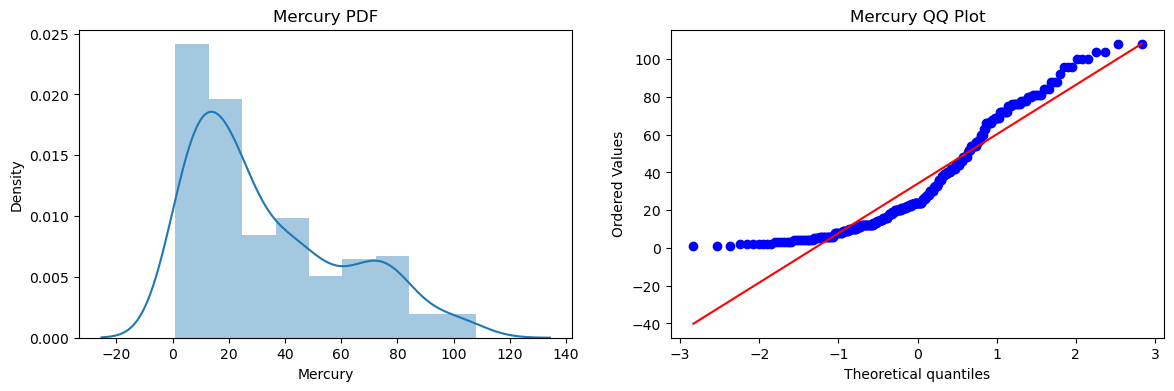

In [9]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Mercury'])
plt.title('Mercury PDF')

plt.subplot(122)
stats.probplot(X_train['Mercury'], dist='norm', plot=plt)
plt.title('Mercury QQ Plot')

plt.show()

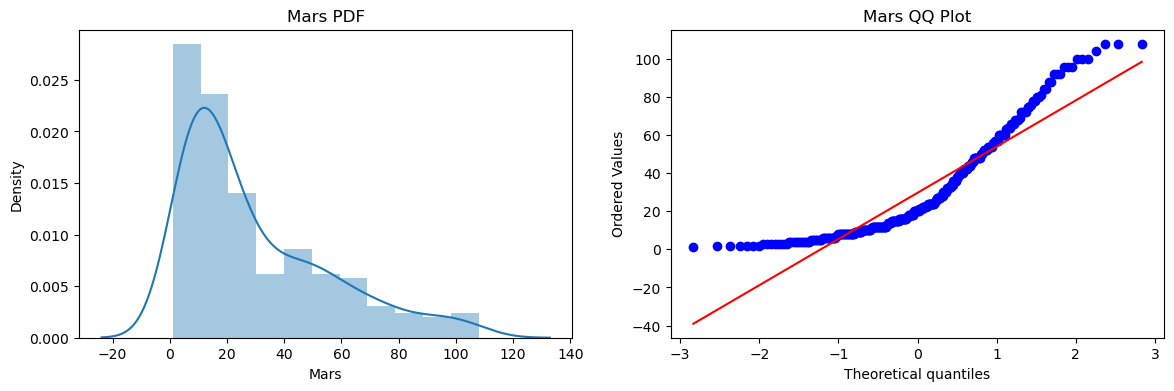

In [10]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Mars'])
plt.title('Mars PDF')

plt.subplot(122)
stats.probplot(X_train['Mars'], dist='norm', plot=plt)
plt.title('Mars QQ Plot')

plt.show()

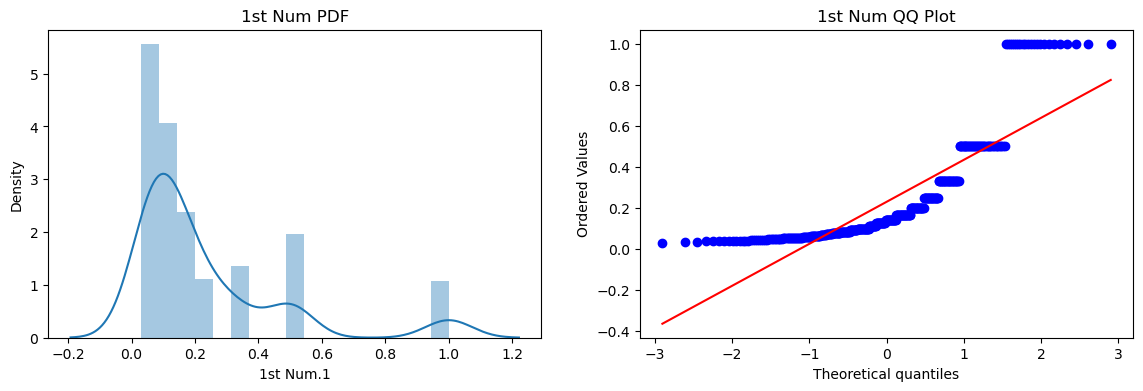

In [11]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(y)
plt.title('1st Num PDF')

plt.subplot(122)
stats.probplot(y, dist='norm', plot=plt)
plt.title('1st Num QQ Plot')

plt.show()

In [12]:
trf = FunctionTransformer(func = np.log1p)

In [13]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [19]:
# lr1 = LogisticRegression()
# dt1 = DecisionTreeClassifier()
linr1 = LinearRegression()

# lr1.fit(X_train_transformed, y_train)
# dt1.fit(X_train_transformed, y_train)
linr1.fit(X_train_transformed, y_train)

# y_pred_lr1 = lr1.predict(X_test_transformed)
# y_pred_dt1 = dt1.predict(X_test_transformed)
y_pred_linr1 = linr1.predict(X_test_transformed)

# print("Accuracy LR: ",accuracy_score(y_test, y_pred_lr1))
# print("Accuracy DT: ",accuracy_score(y_test, y_pred_dt1))
print("Accuracy LinR: ",r2_score(y_test, y_pred_linr1))

Accuracy LinR:  -0.015716047684163792


In [ ]:
X_transformed = trf.fit_transform(X)

lr2 = LogisticRegression()
dt2 = DecisionTreeClassifier()

print("LR: ",np.mean(cross_val_score(lr2, X_transformed, y, scoring='accuracy', cv=10)))
print("DT: ",np.mean(cross_val_score(dt2, X_transformed, y, scoring='accuracy', cv=10)))

In [ ]:
# Mercury after transformation

plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Mercury'], dist='norm', plot=plt)
plt.title('Mercury before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Mercury'], dist='norm', plot=plt)
plt.title('Mercury after Log')

plt.show()

In [ ]:
# Mars after transformation

plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Mars'], dist='norm', plot=plt)
plt.title('Mars before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Mars'], dist='norm', plot=plt)
plt.title('Mars after Log')

plt.show()